In [31]:
from data.gen_data import build_X, build_Y, build_XY
from data.gen_data_config import gen_data_config
from evaluation import score
import pandas as pd
import numpy as np
from util import plot_roi, categori_reverse
from model import build_model, build_embed_model
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets

In [32]:
def tsne_trans(input):
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
    return tsne.fit_transform(input)

In [33]:
embedding_shape = 32
batch_size = 128
epochs = 300

In [34]:
data_s, data_e = '2001/1/1', '2018/12/31'
target_s, target_e = '2019/1/1', '2019/12/31'
feature_days = 5

In [35]:
sne_dict = {
    'data':{},
    'tar':{}
}
embed_dict = {
    'data':{},
    'tar':{}
}

In [36]:
ts_id = 2
x = build_X(data_s, data_e, 
            gen_data_config['selected_features'], 
            feature_days)
tar_x = build_X(target_s, target_e, 
                 gen_data_config['selected_features'], 
                 feature_days)

# Task_1

是否最高最低都在30以內，區分是否明天是否為盤整盤

In [37]:
task = '1'
ts_id = 3

In [38]:
'''Data'''
locals()[f'task_{task}_y'], _ = build_Y(data_s, data_e, ts_id)
x = np.reshape(x, (-1, feature_days, len(gen_data_config['selected_features'])))
tar_x = np.reshape(tar_x, (-1, feature_days, len(gen_data_config['selected_features'])))
locals()[f'task_{task}_y'] = keras.utils.to_categorical(locals()[f'task_{task}_y'], 2)

In [39]:
'''build model'''
model = build_embed_model('rnn', x.shape, locals()[f'task_{task}_y'].shape, 
                                 embedding_shape, 'softmax')
model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

In [40]:
'''Fit models and use validation_split=0.1 '''
history = model.fit(x, 
                    locals()[f'task_{task}_y'],
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Train on 4010 samples, validate on 446 samples
Epoch 1/300
4010/4010 [==============================] - 3s 665us/step - loss: 0.6813 - accuracy: 0.6409 - val_loss: 0.5235 - val_accuracy: 0.9215
Epoch 2/300
4010/4010 [==============================] - 2s 383us/step - loss: 0.5116 - accuracy: 0.8611 - val_loss: 0.3977 - val_accuracy: 0.9238
Epoch 3/300
4010/4010 [==============================] - 2s 384us/step - loss: 0.4161 - accuracy: 0.8975 - val_loss: 0.3564 - val_accuracy: 0.9238
Epoch 4/300
4010/4010 [==============================] - 2s 386us/step - loss: 0.3459 - accuracy: 0.9047 - val_loss: 0.3030 - val_accuracy: 0.9238
Epoch 5/300
4010/4010 [==============================] - 2s 386us/step - loss: 0.3071 - accuracy: 0.9055 - val_loss: 0.2904 - val_accuracy: 0.9238
Epoch 6/300
4010/4010 [==============================] - 2s 382us/step - loss: 0.2788 - accuracy: 0.9085 - val_loss: 0.2920 - val_accuracy: 0.9238
Epoch 7/300
4010/4010 [==============================] - 2s 381us/step 

4010/4010 [==============================] - 2s 376us/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 0.7626 - val_accuracy: 0.8498
Epoch 104/300
4010/4010 [==============================] - 2s 381us/step - loss: 0.0216 - accuracy: 0.9910 - val_loss: 0.6896 - val_accuracy: 0.9013
Epoch 105/300
4010/4010 [==============================] - 2s 382us/step - loss: 0.0210 - accuracy: 0.9918 - val_loss: 0.6914 - val_accuracy: 0.8565
Epoch 106/300
4010/4010 [==============================] - 2s 380us/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.6771 - val_accuracy: 0.8632
Epoch 107/300
4010/4010 [==============================] - 2s 381us/step - loss: 0.0153 - accuracy: 0.9940 - val_loss: 0.7527 - val_accuracy: 0.8453
Epoch 108/300
4010/4010 [==============================] - 2s 381us/step - loss: 0.0264 - accuracy: 0.9913 - val_loss: 0.7077 - val_accuracy: 0.8677
Epoch 109/300
4010/4010 [==============================] - 2s 385us/step - loss: 0.0133 - accuracy: 0.9950 - val_loss: 0

4010/4010 [==============================] - 2s 380us/step - loss: 5.0589e-04 - accuracy: 1.0000 - val_loss: 0.8146 - val_accuracy: 0.8744
Epoch 159/300
4010/4010 [==============================] - 2s 380us/step - loss: 3.8401e-04 - accuracy: 1.0000 - val_loss: 0.8217 - val_accuracy: 0.8744
Epoch 160/300
4010/4010 [==============================] - 2s 378us/step - loss: 3.0121e-04 - accuracy: 1.0000 - val_loss: 0.8373 - val_accuracy: 0.8744
Epoch 161/300
4010/4010 [==============================] - 2s 384us/step - loss: 2.3625e-04 - accuracy: 1.0000 - val_loss: 0.8523 - val_accuracy: 0.8722
Epoch 162/300
4010/4010 [==============================] - 2s 378us/step - loss: 2.1654e-04 - accuracy: 1.0000 - val_loss: 0.8596 - val_accuracy: 0.8722
Epoch 163/300
4010/4010 [==============================] - 2s 379us/step - loss: 3.3569e-04 - accuracy: 1.0000 - val_loss: 0.8561 - val_accuracy: 0.8722
Epoch 164/300
4010/4010 [==============================] - 2s 379us/step - loss: 5.8351e-04 - ac

Epoch 213/300
4010/4010 [==============================] - 2s 379us/step - loss: 4.0660e-04 - accuracy: 1.0000 - val_loss: 0.8430 - val_accuracy: 0.8812
Epoch 214/300
4010/4010 [==============================] - 2s 375us/step - loss: 2.8179e-04 - accuracy: 1.0000 - val_loss: 0.8458 - val_accuracy: 0.8812
Epoch 215/300
4010/4010 [==============================] - 2s 382us/step - loss: 2.6560e-04 - accuracy: 1.0000 - val_loss: 0.8484 - val_accuracy: 0.8812
Epoch 216/300
4010/4010 [==============================] - 2s 377us/step - loss: 2.3262e-04 - accuracy: 1.0000 - val_loss: 0.8515 - val_accuracy: 0.8812
Epoch 217/300
4010/4010 [==============================] - 2s 381us/step - loss: 2.6801e-04 - accuracy: 1.0000 - val_loss: 0.8561 - val_accuracy: 0.8834
Epoch 218/300
4010/4010 [==============================] - 2s 379us/step - loss: 1.9898e-04 - accuracy: 1.0000 - val_loss: 0.8616 - val_accuracy: 0.8857
Epoch 219/300
4010/4010 [==============================] - 2s 381us/step - loss: 1

4010/4010 [==============================] - 2s 379us/step - loss: 3.3617e-05 - accuracy: 1.0000 - val_loss: 0.9615 - val_accuracy: 0.8857
Epoch 267/300
4010/4010 [==============================] - 2s 383us/step - loss: 3.9579e-05 - accuracy: 1.0000 - val_loss: 0.9612 - val_accuracy: 0.8857
Epoch 268/300
4010/4010 [==============================] - 2s 382us/step - loss: 3.3778e-05 - accuracy: 1.0000 - val_loss: 0.9628 - val_accuracy: 0.8857
Epoch 269/300
4010/4010 [==============================] - 2s 381us/step - loss: 3.3491e-05 - accuracy: 1.0000 - val_loss: 0.9639 - val_accuracy: 0.8857
Epoch 270/300
4010/4010 [==============================] - 2s 379us/step - loss: 2.9228e-05 - accuracy: 1.0000 - val_loss: 0.9650 - val_accuracy: 0.8857
Epoch 271/300
4010/4010 [==============================] - 2s 380us/step - loss: 2.9745e-05 - accuracy: 1.0000 - val_loss: 0.9659 - val_accuracy: 0.8857
Epoch 272/300
4010/4010 [==============================] - 2s 380us/step - loss: 2.9446e-05 - ac

In [41]:
'''get embedding output'''
get_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[5].output])
embed_dict['data'][task] = get_layer_output([x])[0]
embed_dict['tar'][task] = get_layer_output([tar_x])[0]

In [42]:
'''data t-SNE'''
sne_dict['data'][task]  = tsne_trans(embed_dict['data'][task])
sne_dict['tar'][task] = tsne_trans(embed_dict['tar'][task])

# Task_2

是否最高最低都在30以內，區分是否今天是否為盤整盤

In [43]:
task = '2'
ts_id = 3

In [44]:
feature_day = 0
temp_x = build_X(data_s, data_e, 
                        ['Open', 'High', 'Low'], 
                        feature_day)

locals()[f'task_{task}_y'] = []
for r in temp_x:
#     if (day['High'] - day['Open'] <= amplitude and day['Open'] - day['Low'] <= amplitude):
    if (r[1] - r[0] <= 30 and r[0] - r[2] <= 30):
        locals()[f'task_{task}_y'].append(0)
    else:
        locals()[f'task_{task}_y'].append(1)

locals()[f'task_{task}_y'] = keras.utils.to_categorical(locals()[f'task_{task}_y'], 2)

In [45]:
'''build model'''
model = build_embed_model('rnn', x.shape, locals()[f'task_{task}_y'].shape, 
                                 embedding_shape, 'softmax')
model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

In [46]:
'''Fit models and use validation_split=0.1 '''
history = model.fit(x, 
                    locals()[f'task_{task}_y'],
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Train on 4010 samples, validate on 446 samples
Epoch 1/300
4010/4010 [==============================] - 3s 656us/step - loss: 0.6671 - accuracy: 0.6529 - val_loss: 0.5079 - val_accuracy: 0.9238
Epoch 2/300
4010/4010 [==============================] - 2s 379us/step - loss: 0.5166 - accuracy: 0.8569 - val_loss: 0.4130 - val_accuracy: 0.9238
Epoch 3/300
4010/4010 [==============================] - 2s 378us/step - loss: 0.4204 - accuracy: 0.8978 - val_loss: 0.3365 - val_accuracy: 0.9238
Epoch 4/300
4010/4010 [==============================] - 2s 381us/step - loss: 0.3488 - accuracy: 0.9030 - val_loss: 0.2940 - val_accuracy: 0.9238
Epoch 5/300
4010/4010 [==============================] - 2s 377us/step - loss: 0.3058 - accuracy: 0.9035 - val_loss: 0.2814 - val_accuracy: 0.9238
Epoch 6/300
4010/4010 [==============================] - 2s 381us/step - loss: 0.2770 - accuracy: 0.9077 - val_loss: 0.2845 - val_accuracy: 0.9238
Epoch 7/300
4010/4010 [==============================] - 2s 384us/step 

4010/4010 [==============================] - 2s 378us/step - loss: 0.0555 - accuracy: 0.9771 - val_loss: 0.6106 - val_accuracy: 0.8430
Epoch 57/300
4010/4010 [==============================] - 2s 381us/step - loss: 0.0359 - accuracy: 0.9863 - val_loss: 0.6304 - val_accuracy: 0.8610
Epoch 58/300
4010/4010 [==============================] - 2s 382us/step - loss: 0.0326 - accuracy: 0.9883 - val_loss: 0.5370 - val_accuracy: 0.8744
Epoch 59/300
4010/4010 [==============================] - 2s 377us/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.5423 - val_accuracy: 0.8655
Epoch 60/300
4010/4010 [==============================] - 2s 382us/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.5412 - val_accuracy: 0.8744
Epoch 61/300
4010/4010 [==============================] - 2s 379us/step - loss: 0.0213 - accuracy: 0.9940 - val_loss: 0.5419 - val_accuracy: 0.8789
Epoch 62/300
4010/4010 [==============================] - 2s 379us/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.5698 

4010/4010 [==============================] - 2s 379us/step - loss: 0.0561 - accuracy: 0.9753 - val_loss: 0.6591 - val_accuracy: 0.8318
Epoch 112/300
4010/4010 [==============================] - 2s 382us/step - loss: 0.0595 - accuracy: 0.9791 - val_loss: 0.7661 - val_accuracy: 0.8453
Epoch 113/300
4010/4010 [==============================] - 1s 374us/step - loss: 0.0371 - accuracy: 0.9865 - val_loss: 0.6785 - val_accuracy: 0.8475
Epoch 114/300
4010/4010 [==============================] - 2s 382us/step - loss: 0.0256 - accuracy: 0.9903 - val_loss: 0.6567 - val_accuracy: 0.8700
Epoch 115/300
4010/4010 [==============================] - 2s 380us/step - loss: 0.0109 - accuracy: 0.9975 - val_loss: 0.6725 - val_accuracy: 0.8744
Epoch 116/300
4010/4010 [==============================] - 2s 378us/step - loss: 0.0064 - accuracy: 0.9975 - val_loss: 0.6899 - val_accuracy: 0.8789
Epoch 117/300
4010/4010 [==============================] - 2s 381us/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [47]:
'''get embedding output'''
get_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[5].output])
embed_dict['data'][task] = get_layer_output([x])[0]
embed_dict['tar'][task] = get_layer_output([tar_x])[0]

In [48]:
'''data t-SNE'''
sne_dict['data'][task]  = tsne_trans(embed_dict['data'][task])
sne_dict['tar'][task] = tsne_trans(embed_dict['tar'][task])

Text(0.5, 0.98, 't-SNE model:LSTM_32')

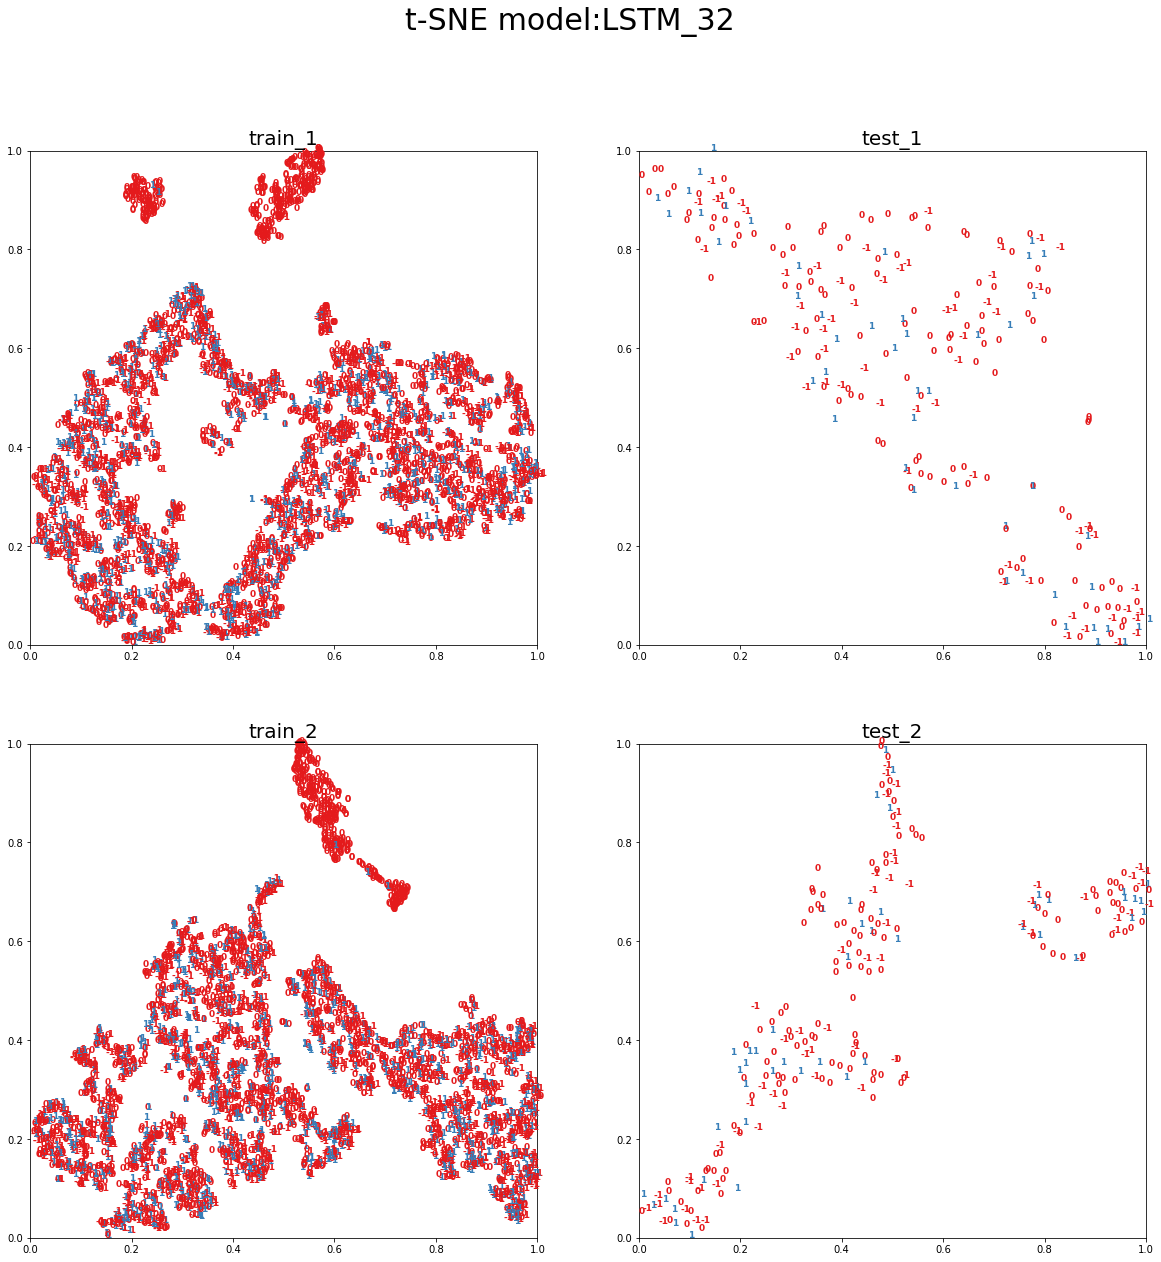

In [59]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

for i, t in zip(range(1,3), ['1', '2']):
    right = i*2
    left = right - 1
    '''plot left'''
    X_tsne = sne_dict['data'][t]
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)  # 正規化
    for i in range(X_norm.shape[0]):
        locals()[f'ax{left}'].text(X_norm[i, 0], X_norm[i, 1], str(sne_tr_y[i]), color=plt.cm.Set1(sne_tr_y[i]), 
             fontdict={'weight': 'bold', 'size': 9})
    '''plot right'''
    X_tsne = sne_dict['tar'][t]
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)  # 正規化
    for i in range(X_norm.shape[0]):
        locals()[f'ax{right}'].text(X_norm[i, 0], X_norm[i, 1], str(sne_te_y[i]), color=plt.cm.Set1(sne_te_y[i]), 
             fontdict={'weight': 'bold', 'size': 9})

    locals()[f'ax{left}'].set_title(f'train_{t}', fontsize=20)
    locals()[f'ax{right}'].set_title(f'test_{t}', fontsize=20)

fig.suptitle(f't-SNE model:LSTM_{embedding_shape}', fontsize=30)

In [60]:
from pickle import dump
fig.savefig(f'./fig/tsne_rnn_{embedding_shape}_v2_{feature_days}.png')
file = open(f'./embedding_data/rnn_{embedding_shape}_v2_{feature_days}', 'wb')
dump(embed_dict, file)